In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = '20250107_NH3_N2/'
file = os.listdir(path)

dfs = []
for f in file[5:104]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(12177, 2048)


,49.750000,50.250000,50.750000,51.250000,51.760000,52.260000,52.760000,53.260000,53.760000,54.260000,...,1186.380000,1186.990000,1187.590000,1188.200000,1188.810000,1189.410000,1190.020000,1190.630000,1191.240000,1191.840000
0,-38.0,-13.0,5.0,13.0,-1.0,39.0,8.0,3.0,-8.0,-21.0,...,-12.0,2.0,-24.0,1.0,-9.0,50.0,-2.0,-22.0,-16.0,-11.0
1,-37.0,-28.0,23.0,2.0,16.0,34.0,13.0,-1.0,-20.0,-15.0,...,-20.0,-2.0,-23.0,9.0,5.0,38.0,-13.0,-23.0,-23.0,15.0
2,-34.0,-25.0,21.0,13.0,5.0,38.0,-8.0,-2.0,-6.0,-17.0,...,-21.0,-7.0,-12.0,9.0,0.0,44.0,-6.0,-20.0,-20.0,-8.0
3,-37.0,-5.0,24.0,12.0,27.0,40.0,9.0,-3.0,-7.0,-21.0,...,-14.0,-2.0,-11.0,4.0,4.0,51.0,-7.0,-33.0,-22.0,7.0
4,-40.0,-23.0,14.0,5.0,32.0,40.0,10.0,-1.0,5.0,-20.0,...,-22.0,-5.0,-12.0,18.0,7.0,63.0,-5.0,-28.0,-22.0,7.0


In [6]:
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.6*i for i in range(len(df.index))]
df.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,-38.0,-13.0,5.0,13.0,-1.0,39.0,8.0,3.0,-8.0,-21.0,...,-12.0,2.0,-24.0,1.0,-9.0,50.0,-2.0,-22.0,-16.0,-11.0
0.6,-37.0,-28.0,23.0,2.0,16.0,34.0,13.0,-1.0,-20.0,-15.0,...,-20.0,-2.0,-23.0,9.0,5.0,38.0,-13.0,-23.0,-23.0,15.0
1.2,-34.0,-25.0,21.0,13.0,5.0,38.0,-8.0,-2.0,-6.0,-17.0,...,-21.0,-7.0,-12.0,9.0,0.0,44.0,-6.0,-20.0,-20.0,-8.0
1.8,-37.0,-5.0,24.0,12.0,27.0,40.0,9.0,-3.0,-7.0,-21.0,...,-14.0,-2.0,-11.0,4.0,4.0,51.0,-7.0,-33.0,-22.0,7.0
2.4,-40.0,-23.0,14.0,5.0,32.0,40.0,10.0,-1.0,5.0,-20.0,...,-22.0,-5.0,-12.0,18.0,7.0,63.0,-5.0,-28.0,-22.0,7.0


In [34]:
# extact 20, 40 and 60 cycles
# c20 = df[(df.index >= 1690) & (df.index <=1780)]
c40 = df[(df.index >= 3430) & (df.index <=3520)]
# c60 = df[(df.index >= 5130) & (df.index <=5220)]
c40.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
3430.2,-35.0,-15.0,9.0,9.0,20.0,39.0,-8.0,7.0,1.0,-33.0,...,-10.0,2.0,-11.0,4.0,4.0,64.0,-10.0,-27.0,-22.0,-11.0
3430.8,-46.0,-28.0,6.0,16.0,2.0,33.0,10.0,-8.0,-11.0,-36.0,...,-39.0,-19.0,-30.0,6.0,11.0,60.0,-15.0,-41.0,-22.0,-22.0
3431.4,-41.0,-20.0,12.0,-1.0,19.0,40.0,4.0,-4.0,-2.0,-36.0,...,-6.0,5.0,-22.0,-19.0,0.0,39.0,-5.0,-24.0,-31.0,-11.0
3432.0,-36.0,-17.0,20.0,-8.0,-4.0,29.0,-1.0,19.0,-12.0,-16.0,...,-31.0,-20.0,-23.0,-3.0,9.0,40.0,4.0,-24.0,-40.0,-20.0
3432.6,-50.0,-37.0,11.0,4.0,13.0,21.0,6.0,0.0,-12.0,-24.0,...,-36.0,-1.0,-16.0,-5.0,-9.0,36.0,-9.0,-27.0,-29.0,-6.0


In [35]:
c40_log = c40.copy()

x_40 = [0.6*i for i in range(len(c40.index))]
y_40 = c40.columns.tolist()

# absolute
for i in range(len(c40.index)):
    for j in range(len(c40.columns)):
        if c40.iloc[i,j]<0:
            c40.iloc[i,j]=0
# log
for i in range(len(c40_log.index)):
    for j in range(len(c40.columns)):
        if c40_log.iloc[i,j]<=1:
            c40_log.iloc[i,j]=0
        else:
            c40_log.iloc[i,j] = np.log(c40_log.iloc[i,j])

C:\Users\syj43\AppData\Local\Temp\ipykernel_19688\2919208371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c40.iloc[i,j]=0


In [36]:
# scaling
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(np.array(c40_log.columns).reshape(-1, 1))
y_40 = mm.transform(np.array(c40_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

In [37]:
X_40, Y_40 = np.meshgrid(x_40, y_40)
Z_40 = c40_log.T

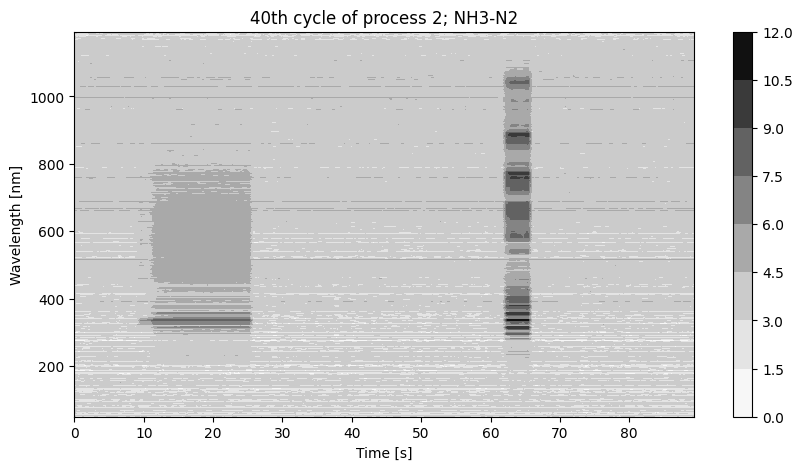

In [38]:
plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

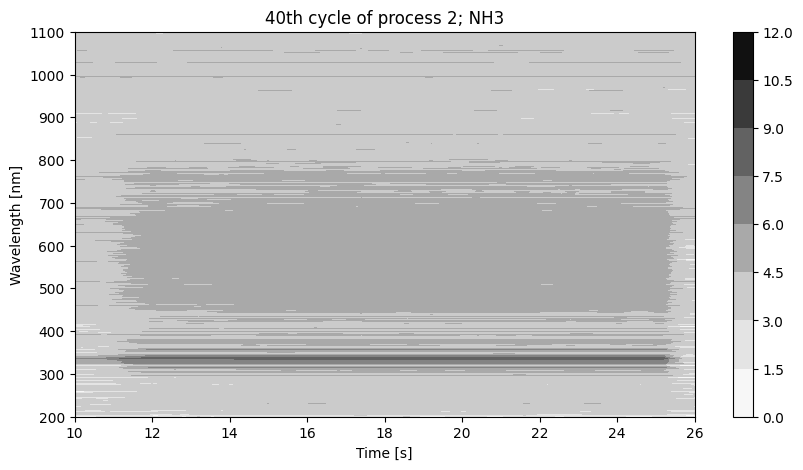

In [45]:
plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(10,26) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 2; NH3')
plt.colorbar()
plt.show()

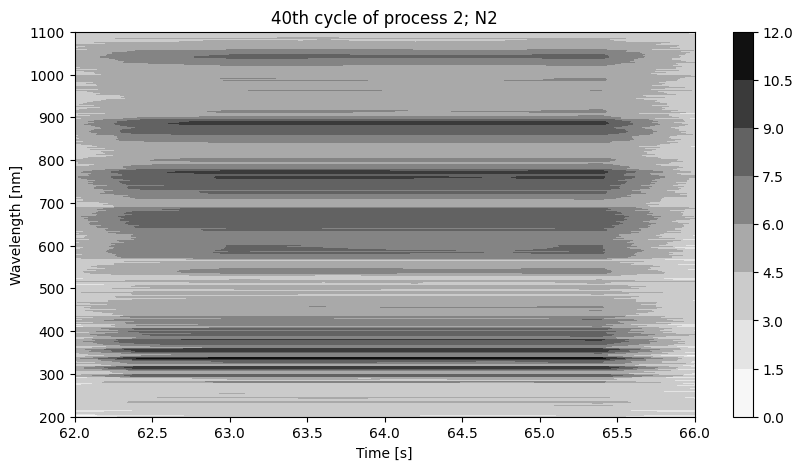

In [46]:
plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(62,66) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 2; N2')
plt.colorbar()
plt.show()

In [48]:
c40_start = 3430.2
c40_NH3 = c40[(c40.index>=c40_start+12)&(c40.index<=c40_start+25)]
c40_N2 = c40[(c40.index>=c40_start+62.5)&(c40.index<=c40_start+65.5)]

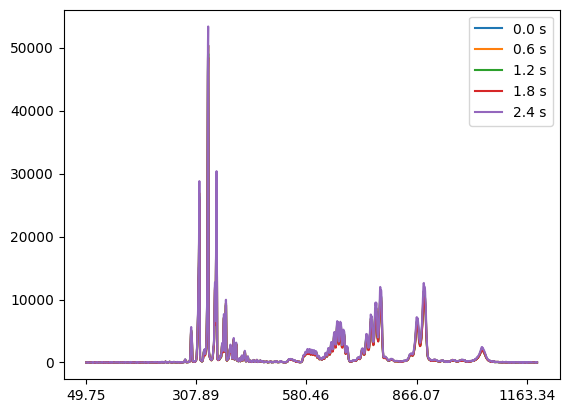

In [69]:
c40_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_N2))]
c40_N2.T.plot(kind='line')
plt.show()

In [67]:
c40_log_N2 = c40_log[(c40_log.index>=c40_start+62.5)&(c40_log.index<=c40_start+65.5)]
c40_log_NH3 = c40_log[(c40_log.index>=c40_start+12)&(c40_log.index<=c40_start+25)]

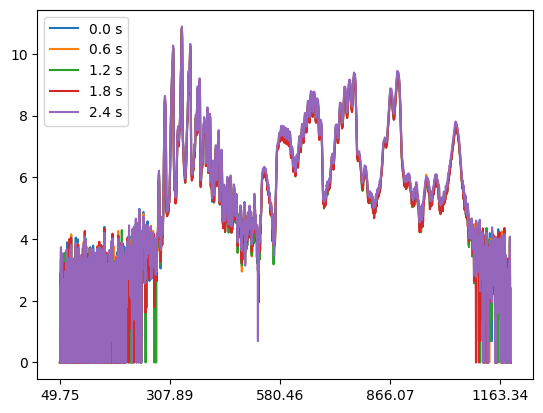

In [68]:
c40_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_N2))]
c40_log_N2.T.plot(kind='line')
plt.show()

In [70]:
# get the plot at 1.2s
c_N2_absolute = c40_N2[c40_N2.index=='1.2 s']
c_N2_absolute.index = [40] # refers to cycles
c_N2_log = c40_log_N2[c40_log_N2.index=='1.2 s']
c_N2_log.index = [40] # refers to cycles

In [71]:
c_N2_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
40,0.0,0.0,8.0,0.0,5.0,36.0,0.0,10.0,0.0,0.0,...,0.0,20.0,0.0,8.0,0.0,58.0,0.0,0.0,0.0,0.0


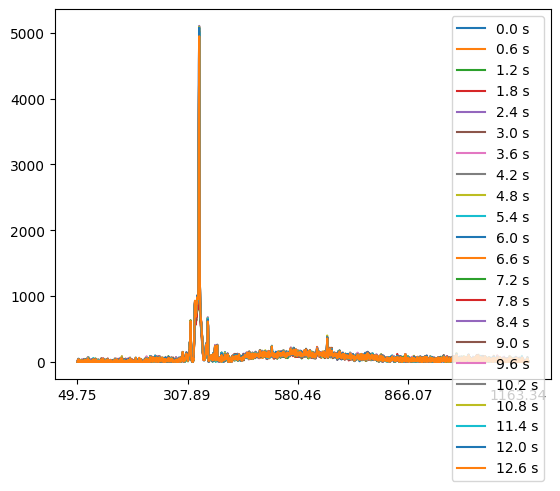

In [72]:
c40_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_NH3))]
c40_NH3.T.plot(kind='line')
plt.show()

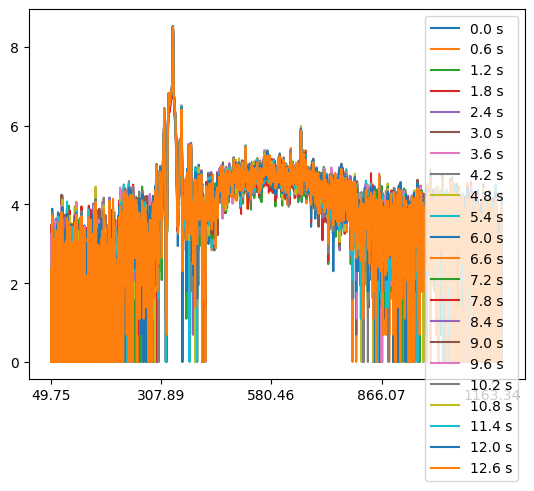

In [73]:
c40_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_NH3))]
c40_log_NH3.T.plot(kind='line')
plt.show()

In [74]:
# save NH3 at 6.6s
c_NH3_absolute = c40_NH3[c40_NH3.index=='6.6 s']
c_NH3_log = c40_log_NH3[c40_log_NH3.index=='6.6 s']

c_NH3_absolute.index = [40] # refers the 20th cycle
c_NH3_log.index = [40]
c_NH3_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
40,0.0,0.0,9.0,0.0,30.0,31.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,2.0,55.0,0.0,0.0,0.0,0.0


In [75]:
# wavelength scaling
mm = MinMaxScaler()
mm.fit(np.array(c_N2_absolute.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(c_N2_absolute.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

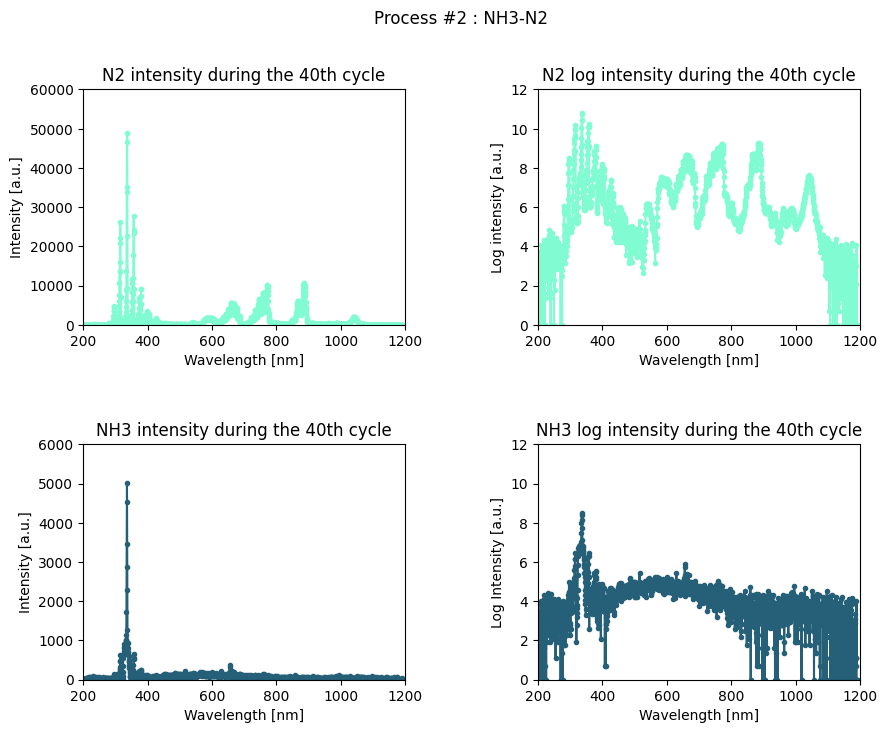

In [76]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=6.5)
i = 0 # save the 40th cycle
axs[0,0].plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[0,0].set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity during the 40th cycle')
axs[0,1].plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
# axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[0,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity during the 40th cycle')
axs[1,0].plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[1,0].set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
axs[1,1].plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[1,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
fig.suptitle('Process #2 : NH3-N2')
plt.show()

No significant differences in a change of intensity with cycles observed.

In [77]:
fig.savefig('file/process2/process2_cycle40.png',bbox_inches=False)

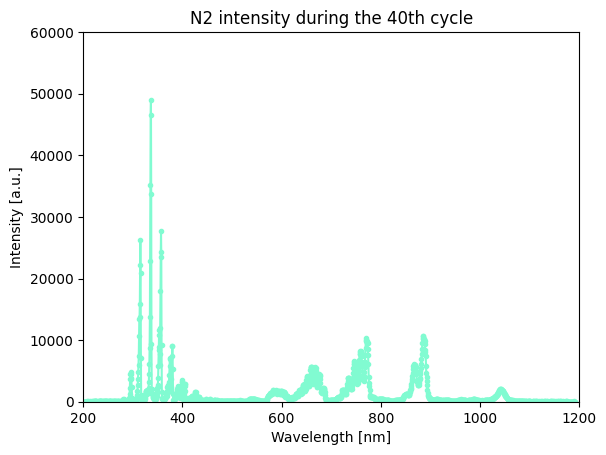

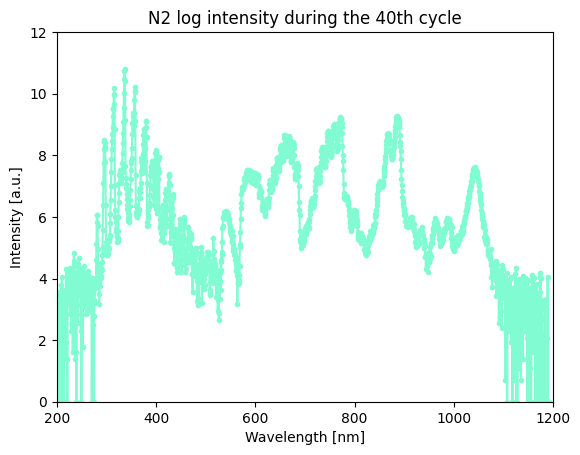

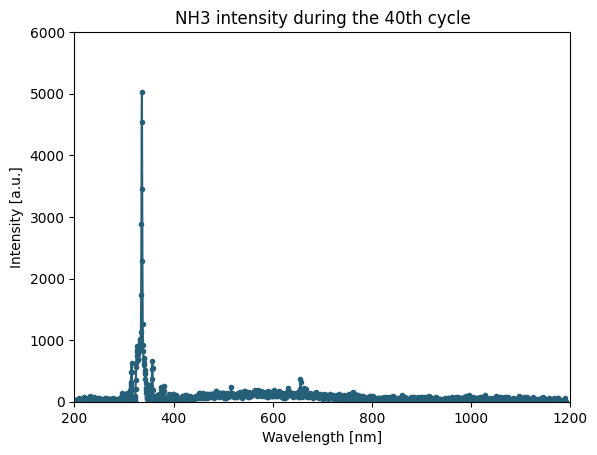

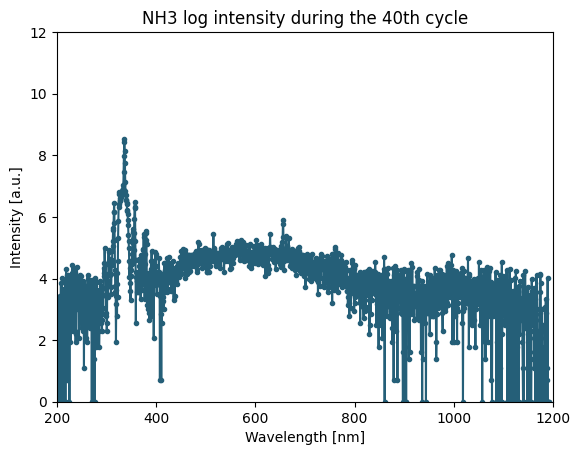

In [79]:
# to save each plot

i = 0 # save the 40th cycle
fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_N2_absolute')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 log intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_N2_log')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_NH3_absolute')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_NH3_log')

# fig, axis = plt.plot(c_N2_log.values.tolist()[i],'.-',color=colors[i])
# # axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity during the 40th cycle')
# plt.show()

# plt.plot(c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# # axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# plt.set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
# plt.show()

# plt.plot(c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# # axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# plt.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
# plt.show()

In [84]:
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c_N2_absolute.columns.tolist()]
y = c_N2_absolute.iloc[0]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #2; N2 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[0]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#81FBD1'},
              'marker': {'color': [#81FBD1, #81FBD1, #81FBD1, ..., #81FBD1,
                                   #81FBD1, #81FBD1],
                         'line': {'color': [#81FBD1, #81FBD1, #81FBD1, ...,
                                            #81FBD1, #81FBD1, #81FBD1],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '59f9f42a-ff73-484b-8cd7-088961345b6d',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0., 0., 8., ..., 0., 0., 0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #2; N2 intensity during the 40th cycle'},
               'xaxis': {'gridcolor': 'lightgrey',
                     

In [85]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process2/process2_peaks__N2_absolute.csv', index=False)

In [88]:
# make them interactive
x = [float(i) for i in c_N2_log.columns.tolist()]
y = c_N2_log.iloc[0]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,12], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 log intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[0]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#81FBD1'},
              'marker': {'color': [#81FBD1, #81FBD1, #81FBD1, ..., #81FBD1,
                                   #81FBD1, #81FBD1],
                         'line': {'color': [#81FBD1, #81FBD1, #81FBD1, ...,
                                            #81FBD1, #81FBD1, #81FBD1],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '1cd15957-13d9-4714-afc6-821dc863f764',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0.        , 0.        , 2.07944154, ..., 0.        , 0.        ,
                          0.        ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 log intensity during the 40th cyc

In [90]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process2/process2_peaks_N2_log.csv', index=False)

In [92]:
# make them interactive
x = [float(i) for i in c_NH3_absolute.columns.tolist()]
y = c_NH3_absolute.iloc[0]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,6000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #2; NH3 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[3]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#255F78'},
              'marker': {'color': [#255F78, #255F78, #255F78, ..., #255F78,
                                   #255F78, #255F78],
                         'line': {'color': [#255F78, #255F78, #255F78, ...,
                                            #255F78, #255F78, #255F78],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '78bc6c03-e881-4dec-821c-8fb2f867bb72',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0., 0., 9., ..., 0., 0., 0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; NH3 intensity during the 40th cycle'},
               'xaxis': {'gridcolor': 'lightgrey',
                    

In [93]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process2/process2_peaks_NH3_absolute.csv', index=False)

In [94]:
# make them interactive
x = [float(i) for i in c_NH3_log.columns.tolist()]
y = c_NH3_log.iloc[0]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,12], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #2; NH3 log intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[3]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#255F78'},
              'marker': {'color': [#255F78, #255F78, #255F78, ..., #255F78,
                                   #255F78, #255F78],
                         'line': {'color': [#255F78, #255F78, #255F78, ...,
                                            #255F78, #255F78, #255F78],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '5a4e3611-33d2-4157-96e3-852e40e2f883',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0.        , 0.        , 2.19722458, ..., 0.        , 0.        ,
                          0.        ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #2; NH3 log intensity during the 40th cy

In [95]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process2/process2_peaks_NH3_log.csv', index=False)